In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5) 
#이유한님이 항상 쓰는 시각 옵션

import missingno as msno #결측치확인시 사용

import warnings #경고메세지 숨기기
warnings.filterwarnings('ignore')

%matplotlib inline 
#plt.show()하지 않아도 그래프가 출력되게




In [8]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train.describe()
#통계치 반환

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 1.1 Null data check

In [13]:
#Age와 Fare 피쳐에 null 데이터가 있다, 그래프로 시각화해보자
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col,100
        *(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

#{:>10} : 열이름을 10칸 오른쪽으로 정렬
#{:.2f}% : 결측값  비율을 소수점 아래 두 자리까지 표시
#결측값개수 / 해당열전체원소개수 한 후 100을 곱해 반환

column: PassengerId	 Percent of Nan value: 0.00%
column:   Survived	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 19.87%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.00%
column:      Cabin	 Percent of Nan value: 77.10%
column:   Embarked	 Percent of Nan value: 0.22%


In [14]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*
        (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<Axes: >

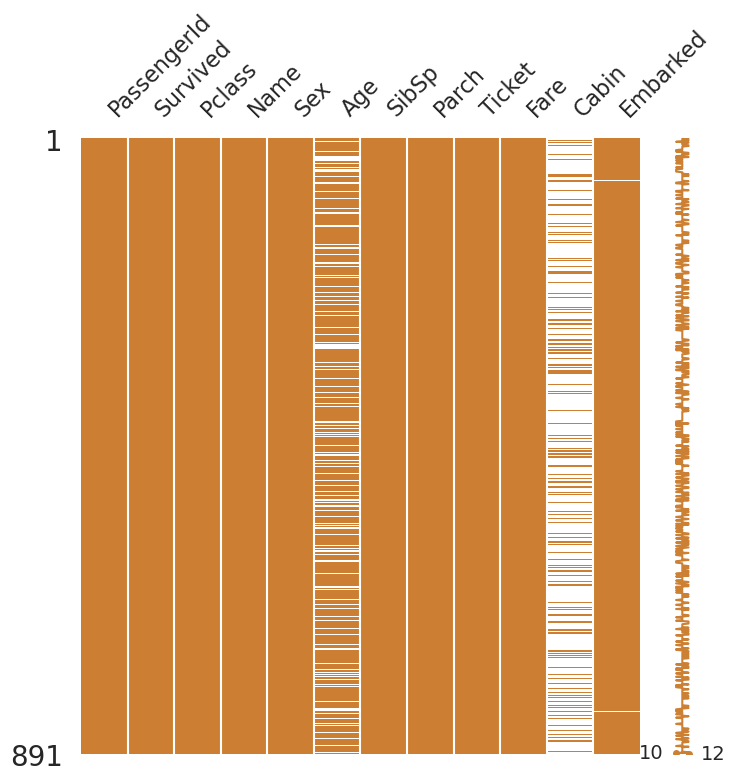

In [16]:
#msno를 사용하면 null data의 존재를 더 쉽게 볼 수 있다.
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8,0.5,0.2))
#iloc[:, :] 모든행과열 인덱싱

<Axes: >

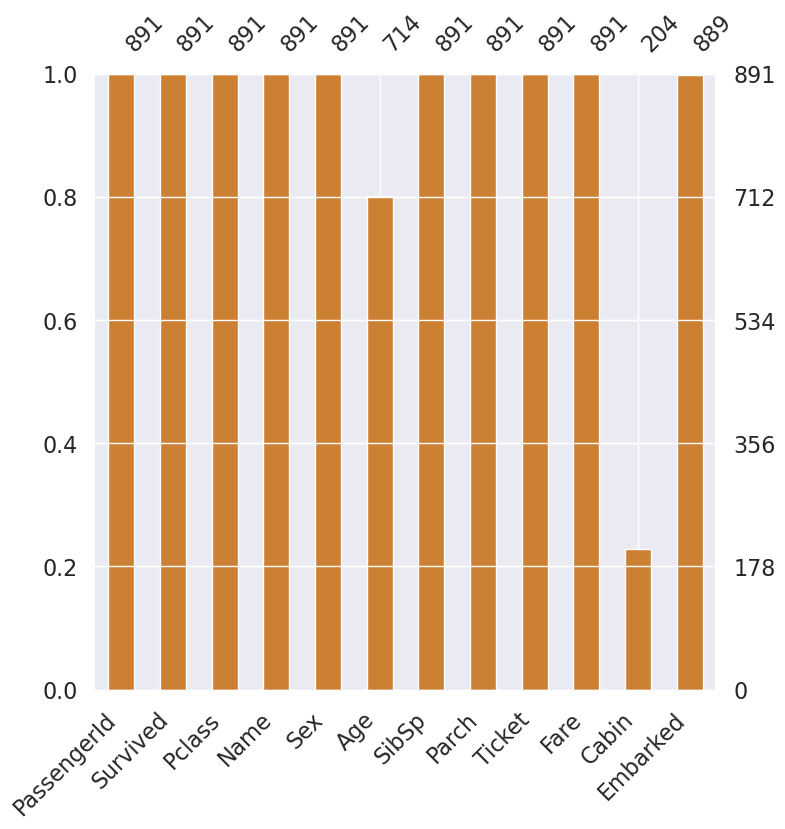

In [17]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8,0.5,0.2))

<Axes: >

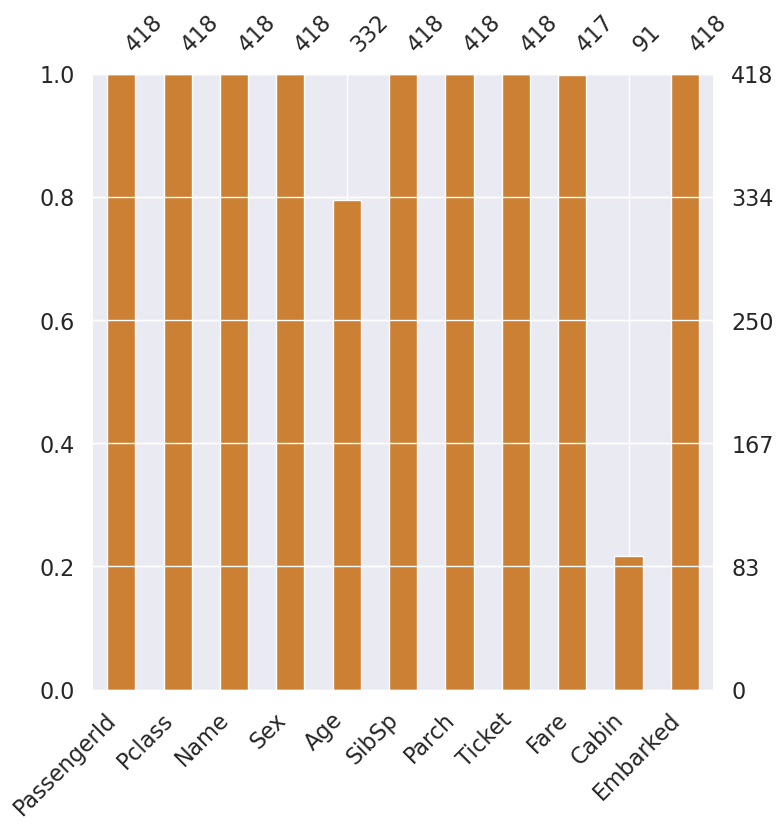

In [18]:
msno.bar(df = df_test.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

# Target Label 확인

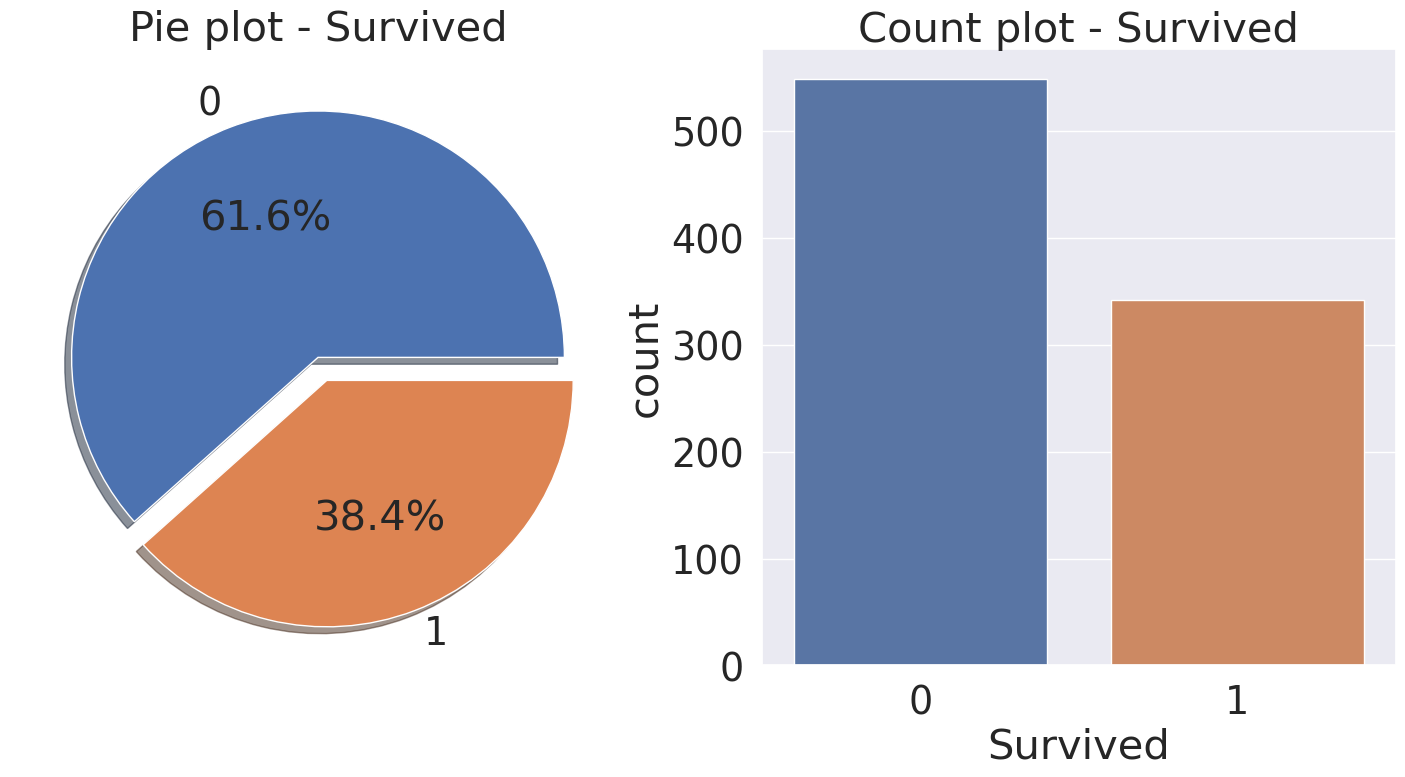

In [22]:
#지금과 같은 2진분류 문제의 경우엔, 1과 0의 붙포가 어떻냐에 따라 모델평가방법이 달라질 수 있음

f, ax = plt.subplots(1,2,figsize=(18, 8))
#두 개의 서브플롯을 가진 피규어 생성

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct= '%1.1f%%', ax= ax[0],
                                            shadow = True)
#plot.pie(): pie차트형태로 시각화
#(explode=[0,0.1] : 각 항목이 원점에서 멀어지는 정도 
#autopct= '%1.1f%%' : pie차트안에 백분율 표시
#ax= ax[0] : 첫번째 서브플롯에 그림 그리도록 지정

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot( x = 'Survived', data = df_train, ax=ax[1])
#두번째 서브플롯에 Survived 피쳐 시각화
#원래코드는 sns.countplot('Survived', data = df_train, ax=ax[1]) 였는데 에러가 떠서 survived 열의 이름 지정
ax[1].set_title('Count plot - Survived')

plt.show()

# Pclass

In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()
#각 pclass별 인원수 (survived = 0,1 카운트)

,Survived
Pclass,
1,216
2,184
3,491


In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()
#각 pclass별 생존자 수 (survived = 1 카운트)

,Survived
Pclass,
1,136
2,87
3,119


In [27]:
#pandas의 corsstab을 사용하면 위 과정을 좀 더 수월하게 볼 수 있다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

# marings = False 일 경우는 all 피쳐가 생성되지 않음

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

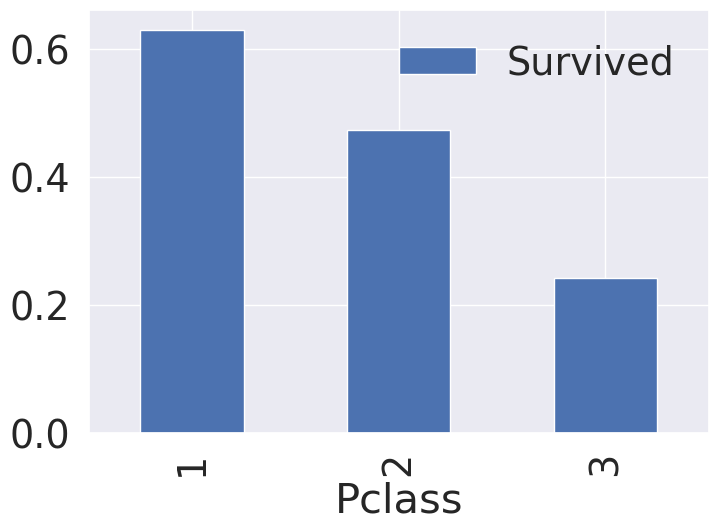

In [31]:
#각 클래스 별 생존율
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by= 'Survived', ascending = False).plot.bar()

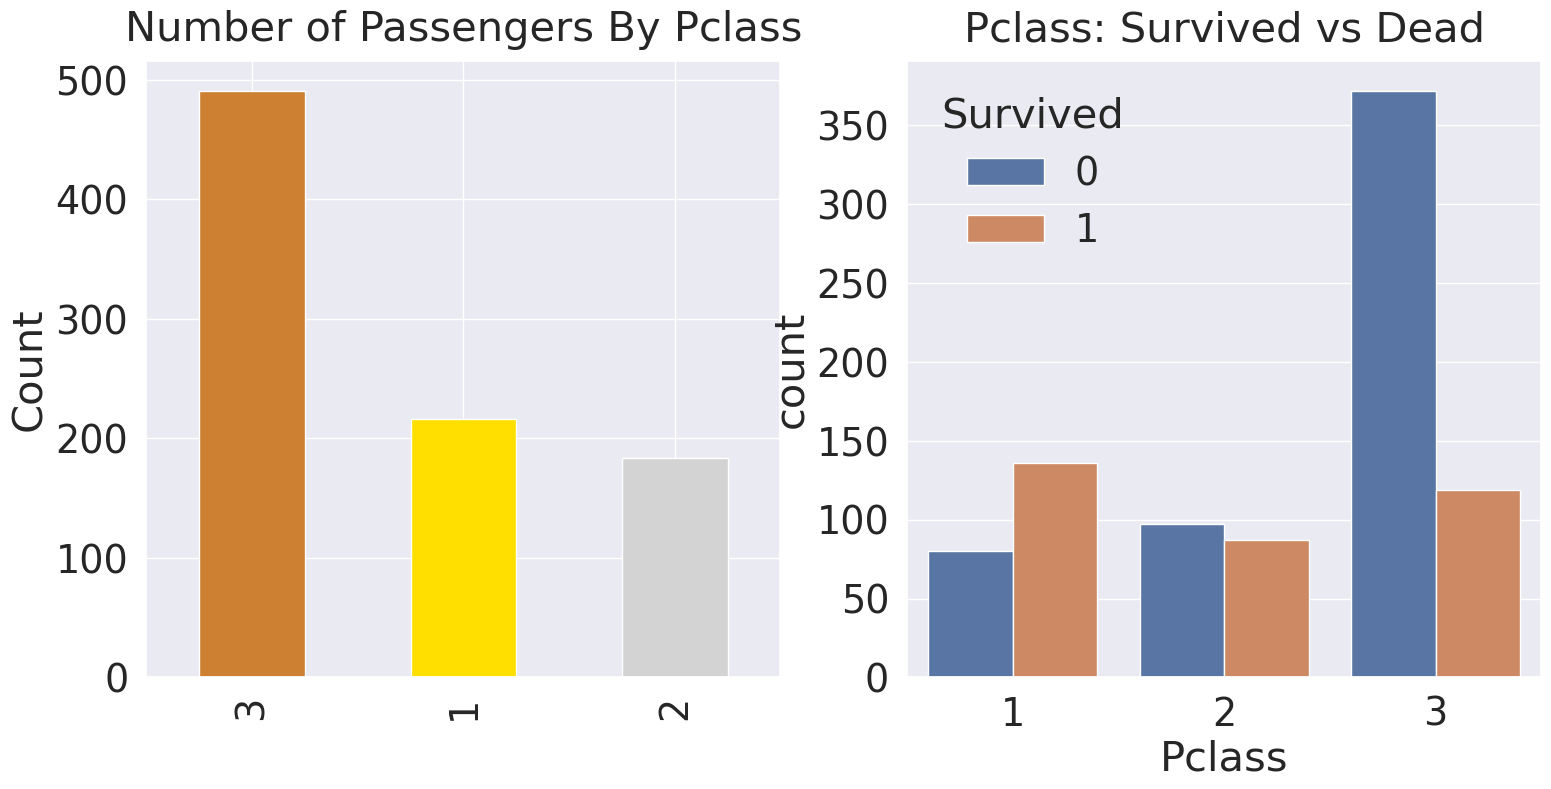

In [33]:
y_position = 1.02 #제목을 약간 위로 올리기 위해서 사용
f , ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00', '#D3D3D3'], ax =ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train, ax = ax[1])
#hue = 'Survived' : 생존여부에 따라 막대 그래프 색상 다르게
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

# SEX

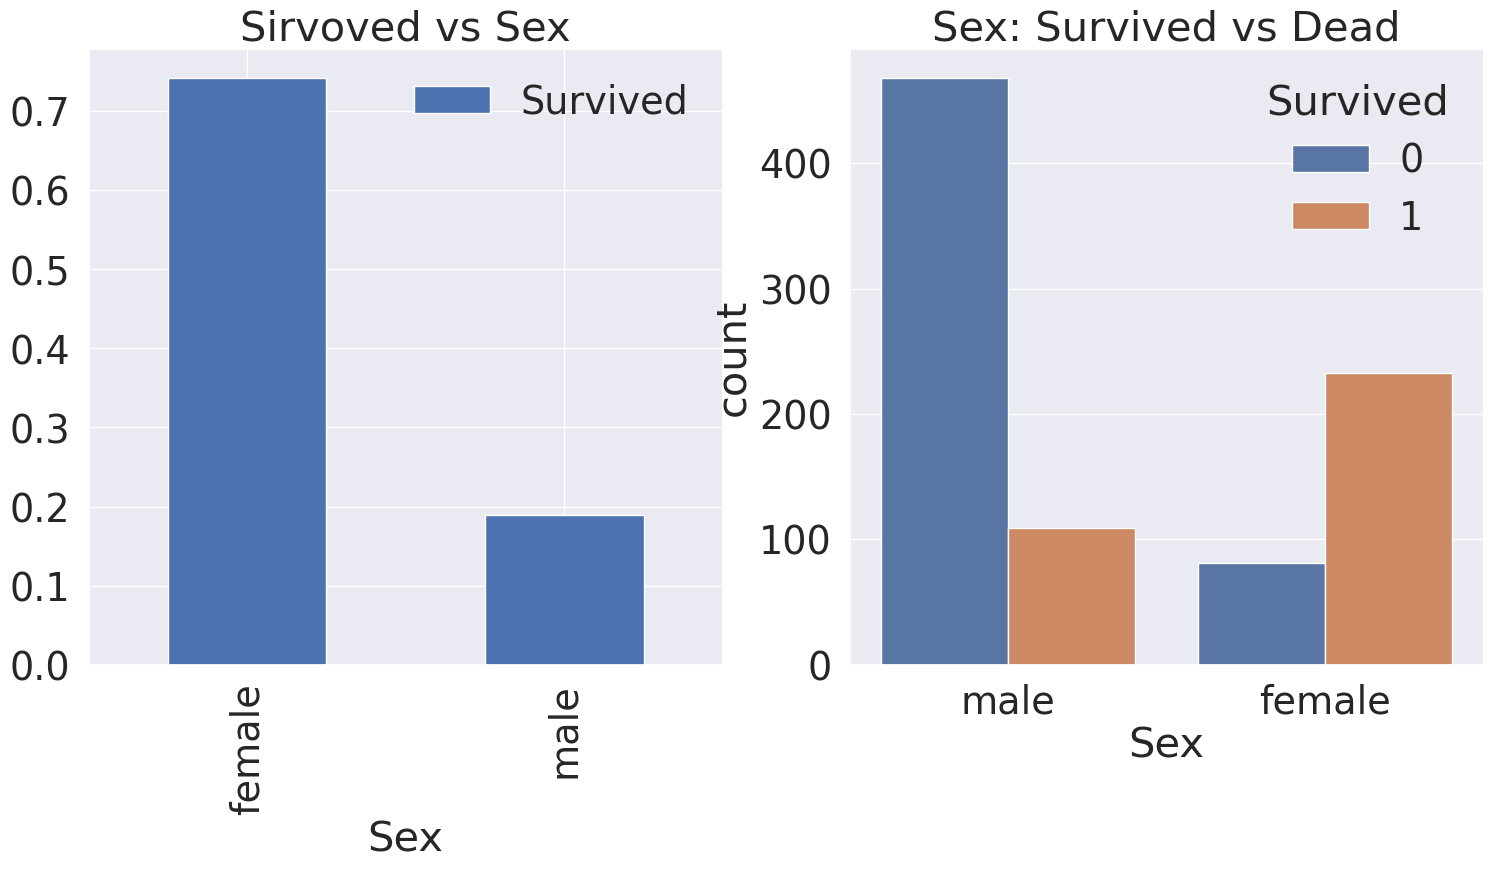

In [35]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sirvoved vs Sex')
sns.countplot(x = 'Sex', hue= 'Survived', data=df_train, ax=ax[1])
#hue = : 지정해준 카테고리별로 색상을 다르게
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [38]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False
                                     ).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [39]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# both sex and Pclass

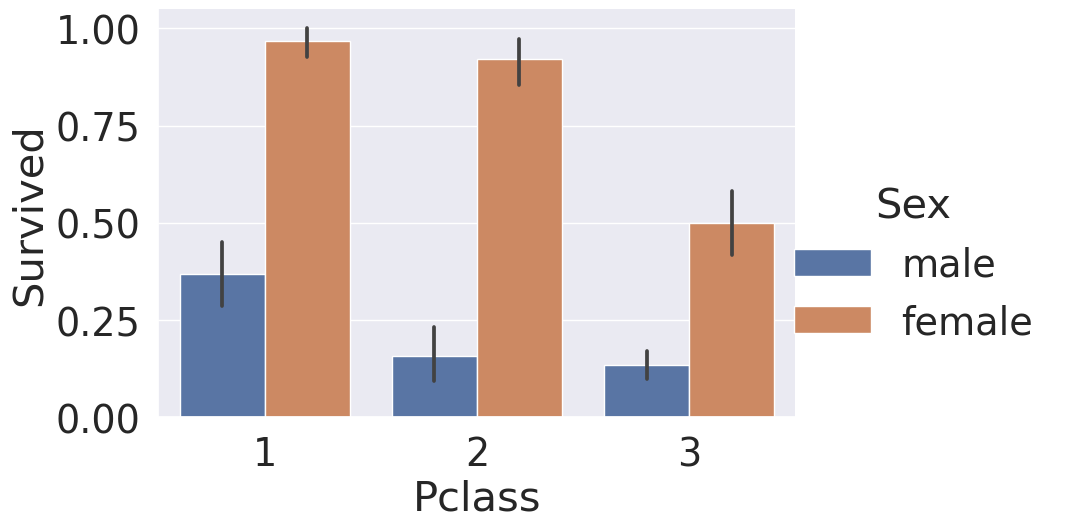

In [53]:
# 두 가지 피쳐에 관하여 생존이 어떻게 달라지는 지 확인 
#factorplot으로 3차원그래프를 그릴 수 있다.
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='bar', height=6, aspect=1.5)

#sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
#factorplot이 catplot으로 통합되었다 합니다..

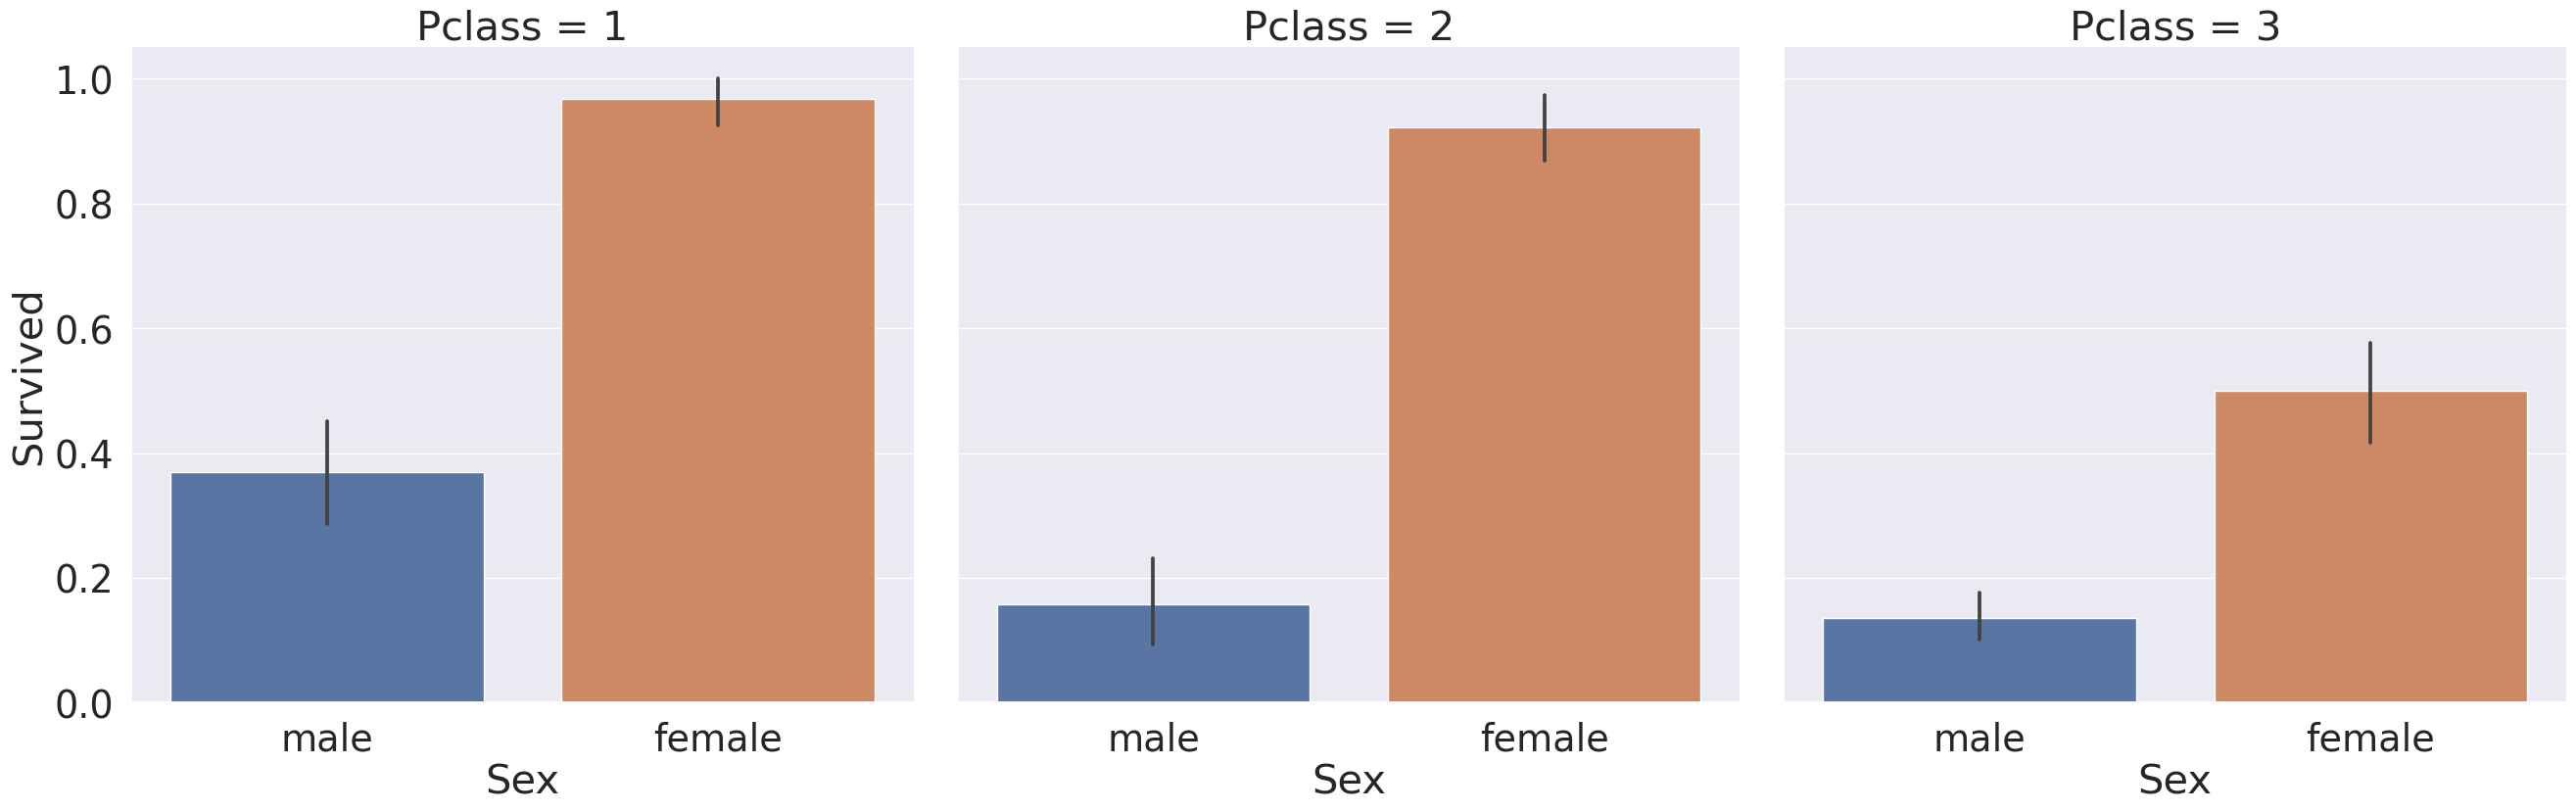

In [63]:
sns.catplot(x= 'Sex', y='Survived', col='Pclass', 
           data = df_train, kind='bar' , height=9, aspect=1)

#saturaion은 catplot에서는 삭제된 인자입니다.
# 'size' 가 catplot에서는 'Height'로 변경되었습니다.
#sns.factorplot(x='Sex', y='Survived', col ='Pclass', data=df_train, saturation=.5, size=9, aspect=1)

#hue= 'Pclass' : Pclass에 따라 다른 색상으로 데이터가 표시됨
#col = 'Pclass' : 서로 다른 하위 그래프를 생성하여 데이터를 그룹화

# Age

In [67]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years' .format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


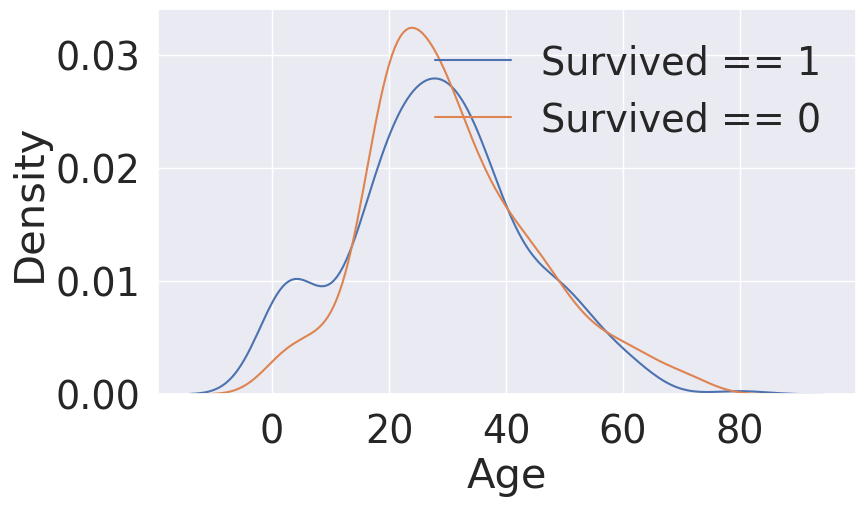

In [68]:
#생존에 따른 age의 히스토그램
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [69]:
#생존자 들 중 나이가 어린 경우가 많다

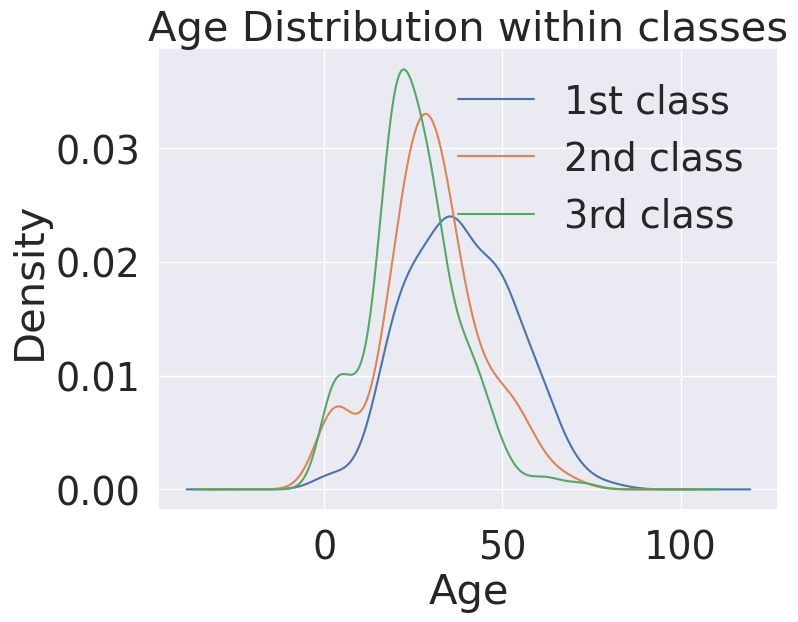

In [71]:
#Age distribution withing classses
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind= 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind= 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind= 'kde')

#kind = kde : 연속적인 데이터 분포를 시각화 할때 사용, 데이터 분포를 더 부드럽고 정교하게 나타냄

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

In [72]:
#class가 높을 수록 나이 많은 사람의 비중이 커짐
#나이대가 변하면서 생존률이 어떻게 되는지가 궁금하다.
#나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 살펴보자

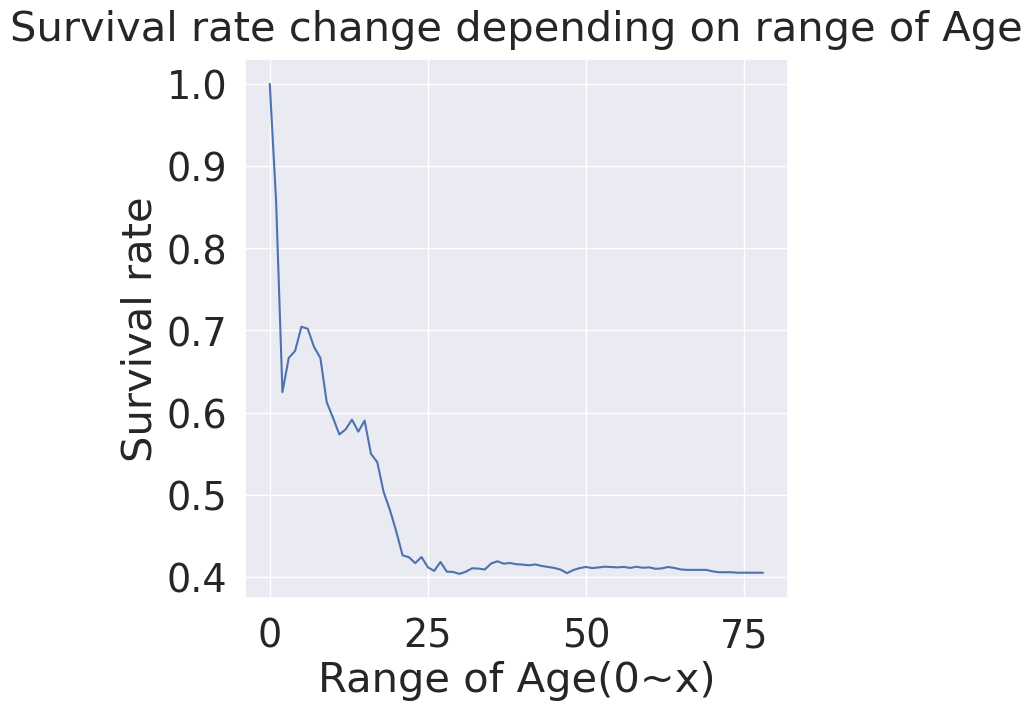

In [73]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]
                    ['Survived'].sum()/len(df_train[df_train['Age'] <  i]['Survived']))
#나이를 1부터 79까지 증가시키면서 해당 나이보다 적은 승객들의 생존비율 계산

plt.figure(figsize= (7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [74]:
#나이가 어릴수록 생존확률이 확실히 높다

# Pclass, Sex, Age

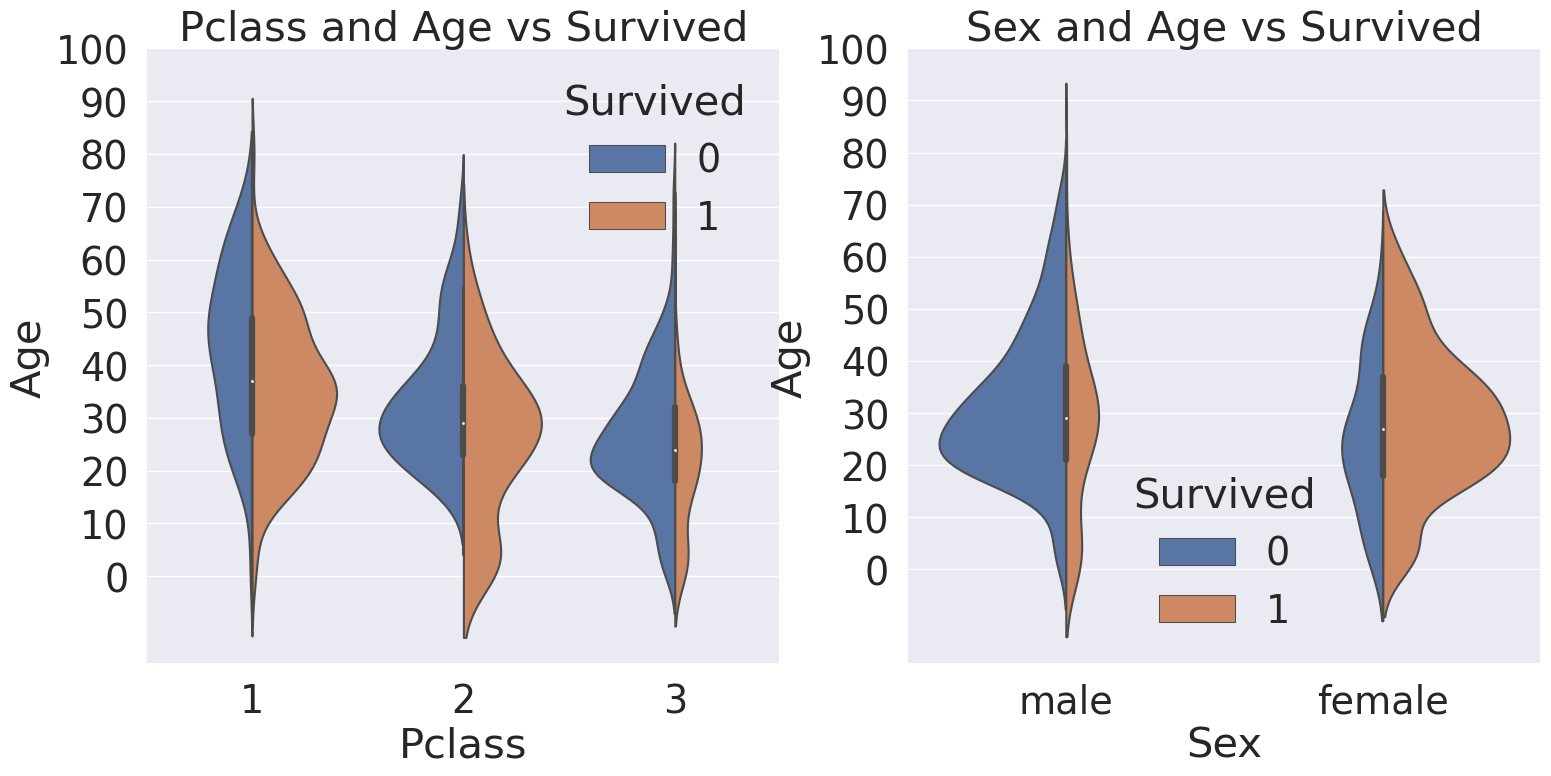

In [78]:
#violin plot으로 앞서 살펴본 모든 피쳐에 대해서 관찰해보자
#x축은 우리가 나눠서 보고싶어하는 케이스(Pclass, Sex)
#y축은 보고 싶어하는 distribution (Age)

f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = 'Pclass',y  = 'Age', hue='Survived', data = df_train, scale='count',
               split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x= 'Sex',y= 'Age', hue = 'Survived', data=df_train, scale='count',
               split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110 ,10))
plt.show()

In [79]:
#왼쪽 : pclass별로 age의 분포와 거기에 따른 생존여부
#오른쪽: 성별과 나이, 생존에 따른 분류
#생존만 봤을때 , 나이가 어릴수록 생존을 많이함
#오른쪽그래프를 보면, 성별이 여자일때 생존을 많이함

# Embarked(탑승항구)

<Axes: xlabel='Embarked'>

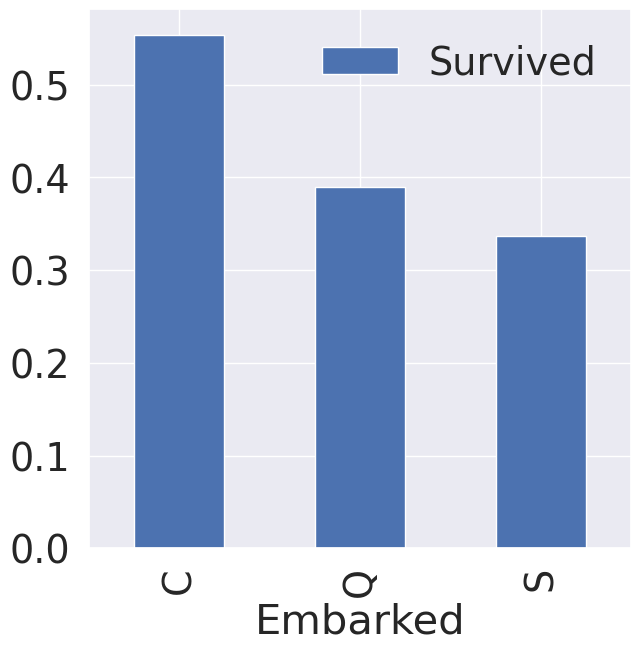

In [81]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

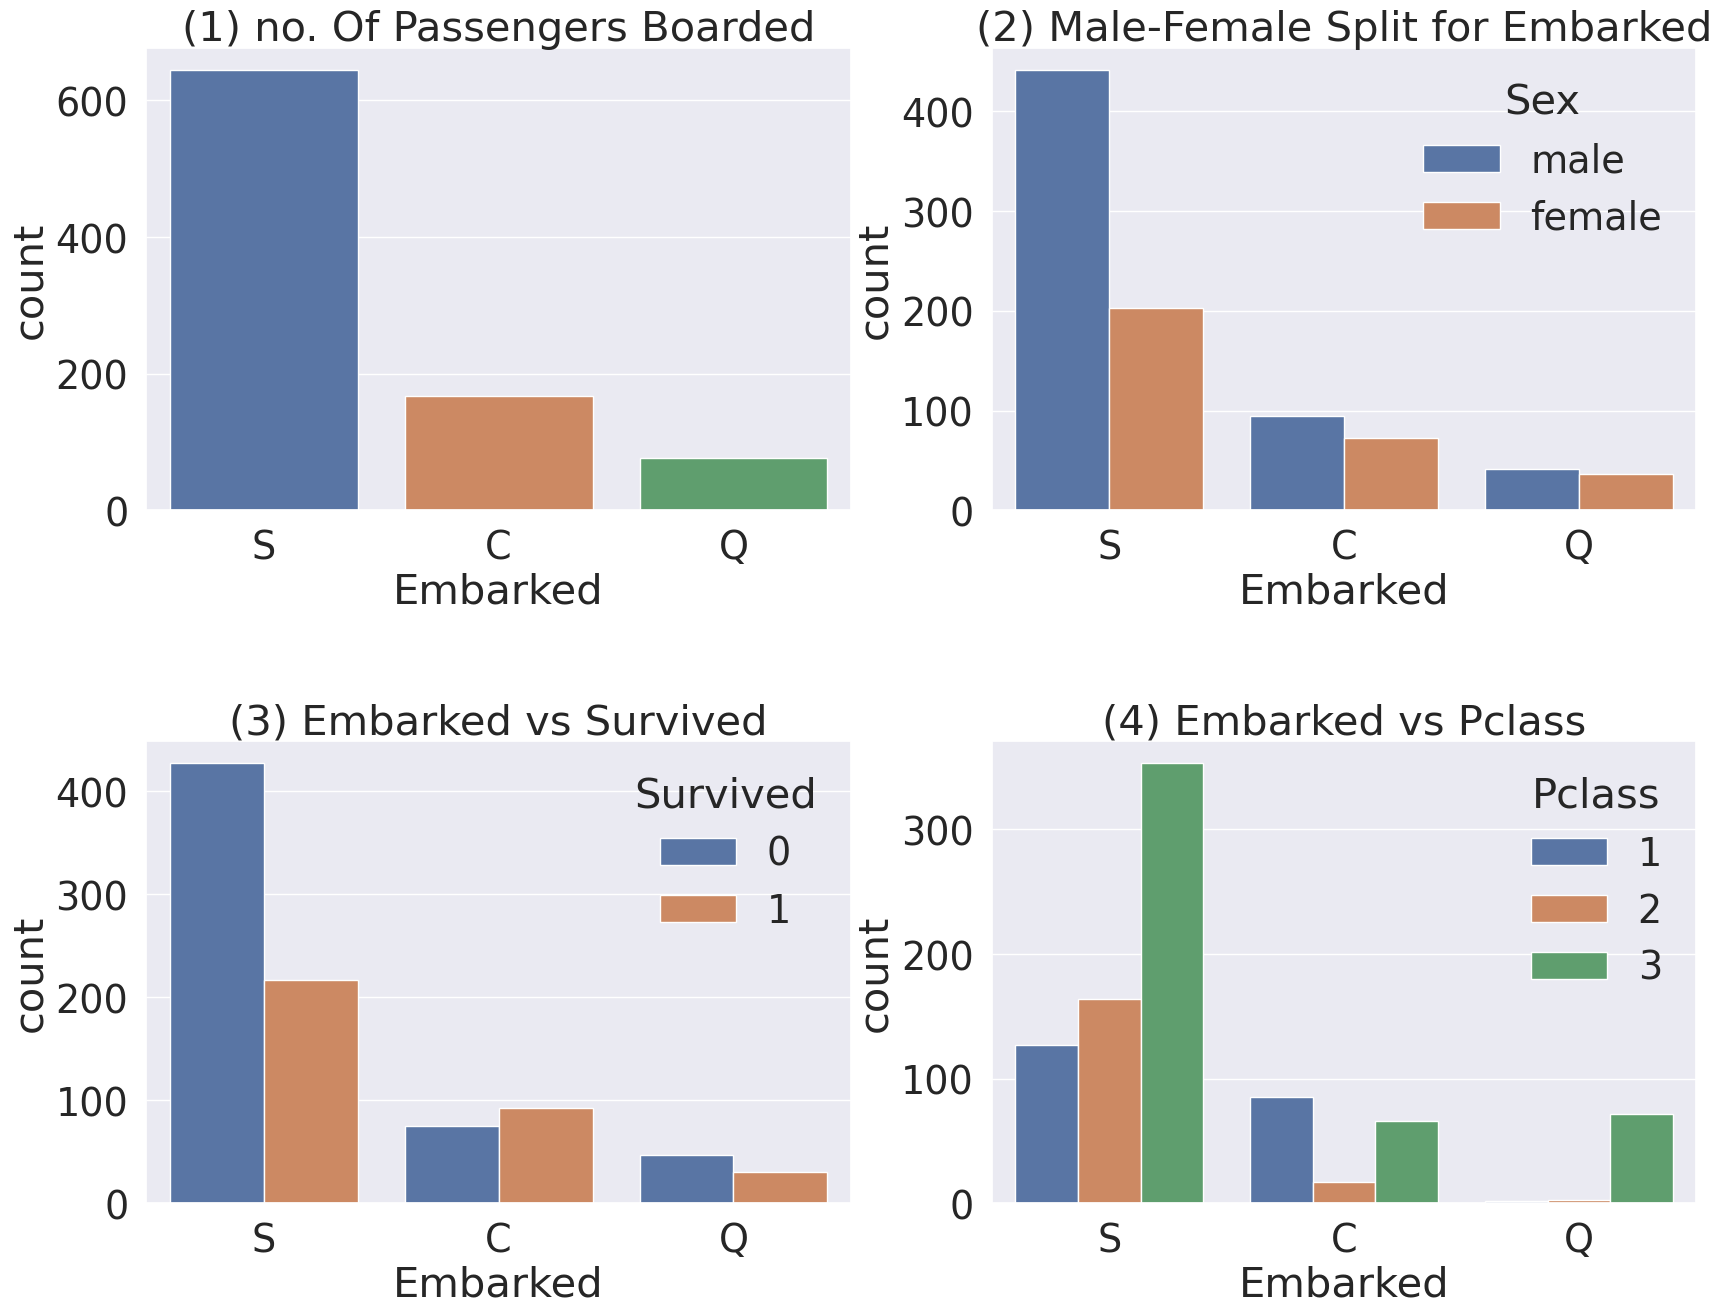

In [85]:
f, ax= plt.subplots(2,2, figsize= (20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) no. Of Passengers Boarded')

sns.countplot(x='Embarked', hue= 'Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue= 'Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.
#Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
#Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. 
#(이전 그래프에서 봤었습니다)
#Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 
#클래스가 높은 사람이 많이 타서 그렇습니다. 
#S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

# Family = sibsp(형제자매), parch(부모ㅡ자녀)

In [86]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1
#자신을 포함해야 하니 +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] +1

print('Maximum Size of Family:', df_train['FamilySize'].max())
print('Minumum Size of Family:', df_train['FamilySize'].min())

Maximum Size of Family: 11
Minumum Size of Family: 1


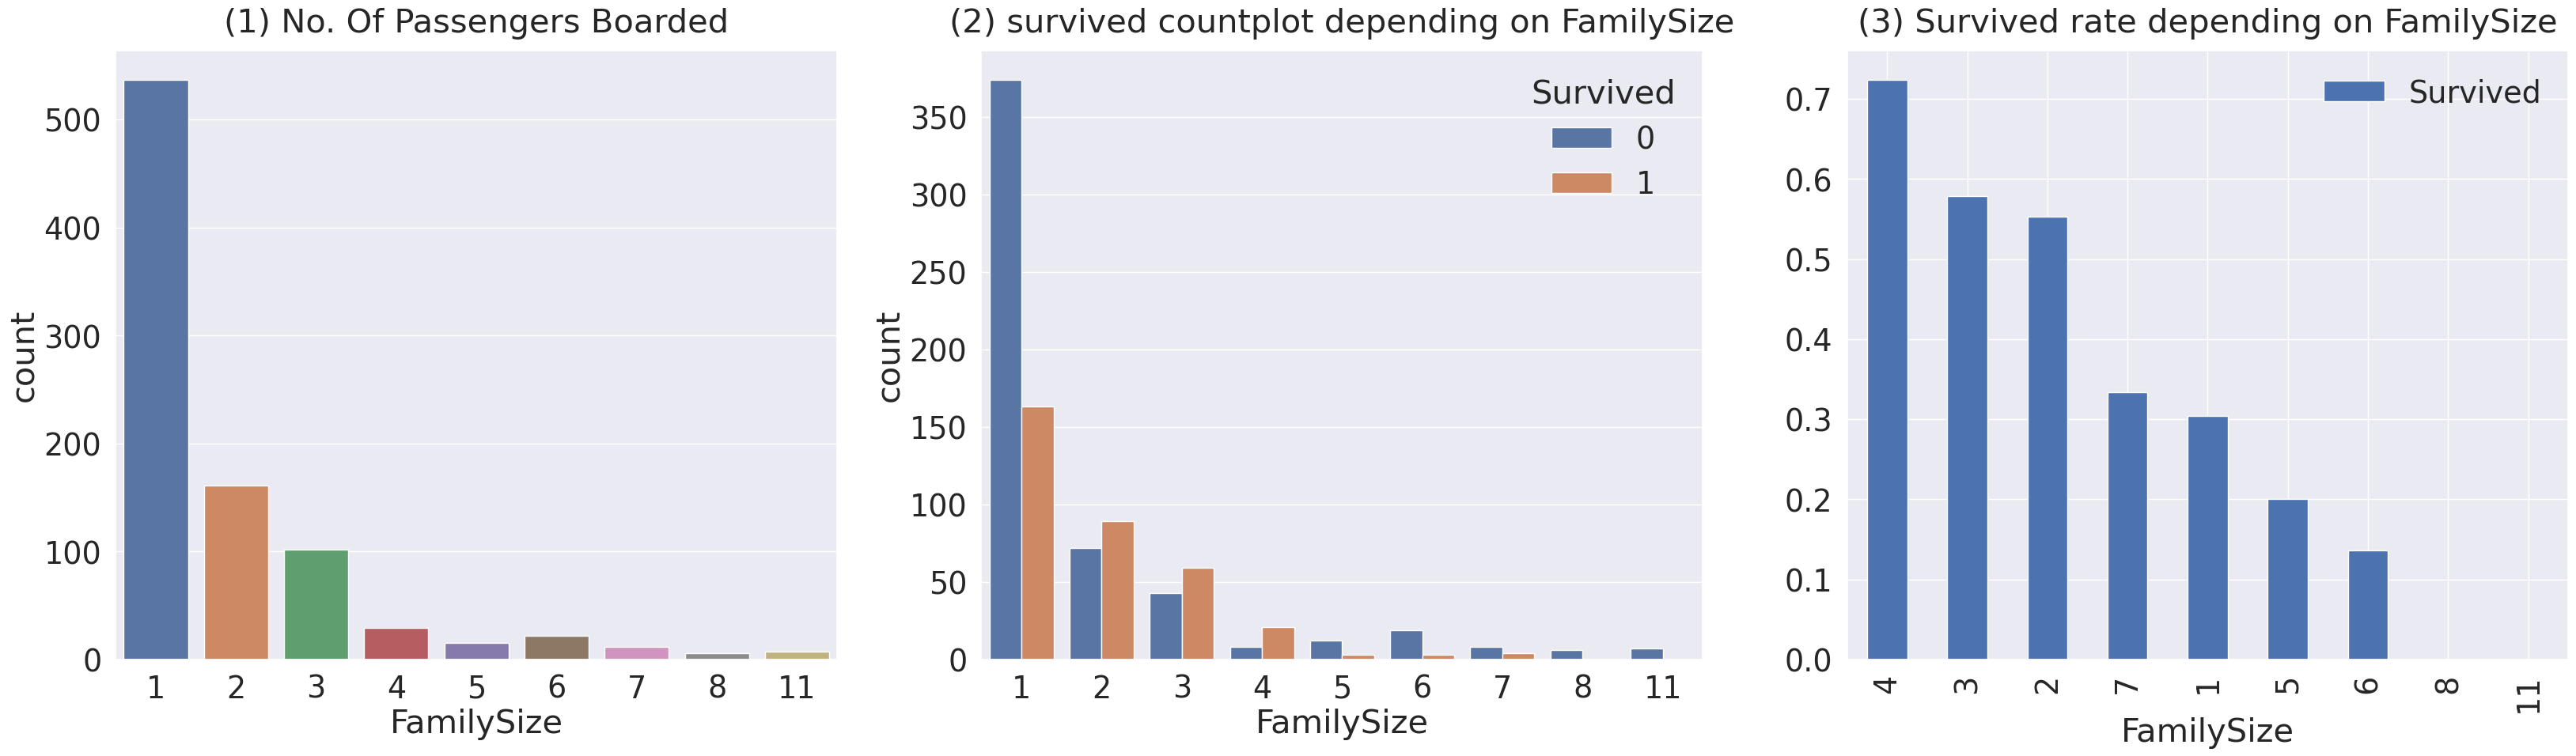

In [89]:
#familysizer와 생존의 상관관계
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot(x='FamilySize', data= df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y= 1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [90]:
#figure2,3 
#가족이 4명인 경우 가장 생존확률이 낮음
#가족수가 너무 작아도 너무 커도 생존확률이 작음

# Fare(탑승요금)

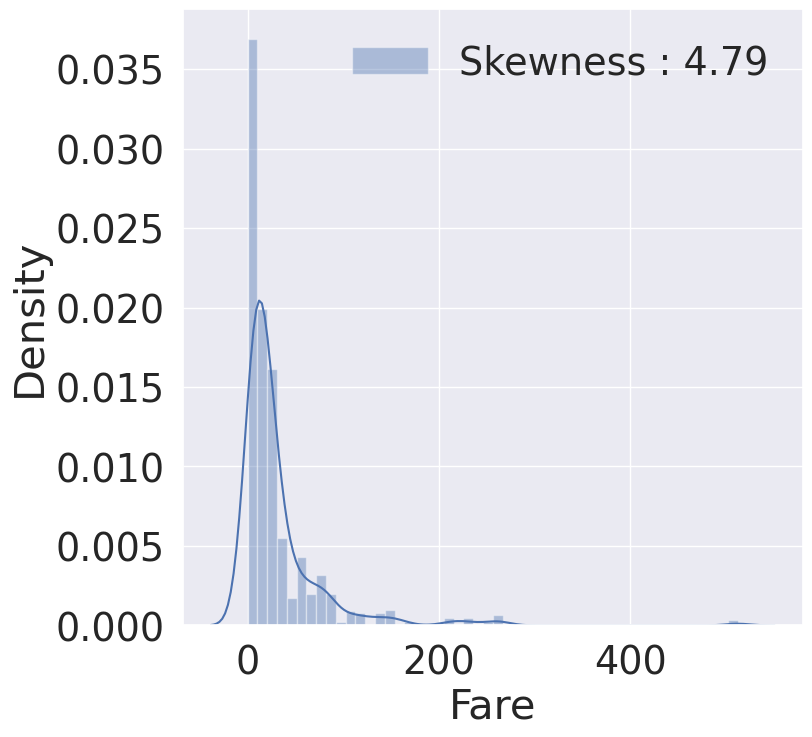

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [96]:
#분포가 너무 비대칭이기 때문에 아웃라이어의 영향을 줄이기 위해 fare에 로그를 취함

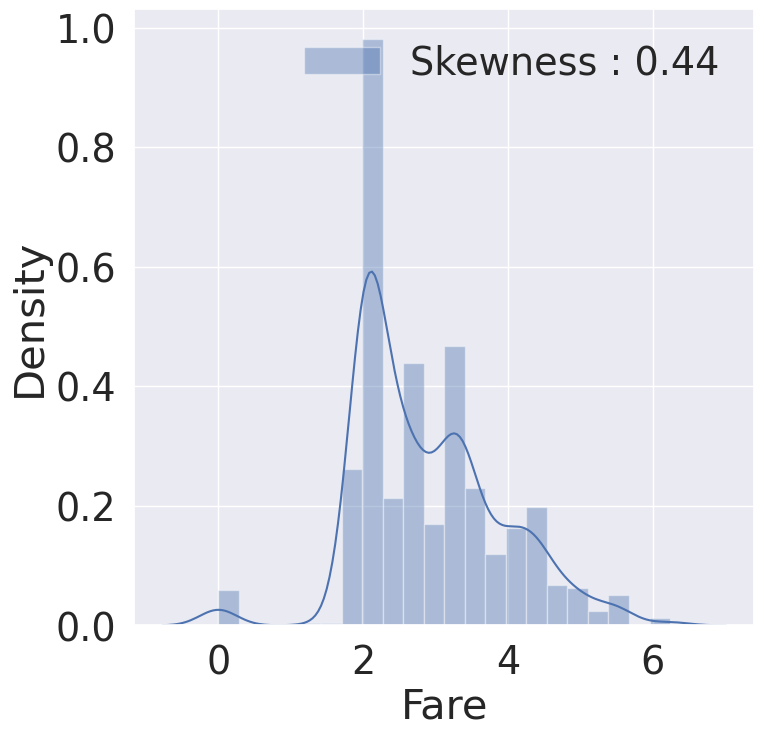

In [98]:
df_test.loc[df_test.Fare.isnull(), 'Fare']= df_test['Fare'].mean()
#테스트셋의 non value를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label= 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc = 'best')

# cabin

In [99]:
#결측값이 80% 정도 되므로 정보를 얻어내기 쉽지 앟음

# Ticket

In [100]:
#string data이므로 아이디어를 생각해 어떤 작업들을 해줘야 모델에 사용가능..
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [101]:
#아이디어를 생각해보자..